## Importation des données

In [99]:
# import libraries
import warnings
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


pd.set_option('display.max_rows', 200)


In [ ]:
# import datas
PATH_FILE = 'input'
application_train = pd.read_csv(f'{PATH_FILE}/application_train.csv')
bureau = pd.read_csv(f'{PATH_FILE}/bureau.csv')
bureau_balance = pd.read_csv(f'{PATH_FILE}/bureau_balance.csv')
pos_cash = pd.read_csv(f'{PATH_FILE}/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv(f'{PATH_FILE}/credit_card_balance.csv')
previous_application = pd.read_csv(f'{PATH_FILE}/previous_application.csv')
installments_payments = pd.read_csv(f'{PATH_FILE}/installments_payments.csv')
columns_description = pd.read_csv(f'{PATH_FILE}/HomeCredit_columns_description.csv', sep=';', encoding='latin1')


### Description des données

In [115]:
datasets = [application_train, bureau, bureau_balance, pos_cash, credit_card_balance, 
            previous_application, installments_payments, columns_description]

df_names = ["application_train", "bureau", "bureau_balance", "pos_cash", "credit_card_balance", 
          "previous_application", "installments_payments", "columns_description"]

info_df = pd.DataFrame({},)
info_df['dataset'] = df_names
info_df['nb_columns'] = [len(df.columns) for df in datasets]
info_df['columns_name'] = [', '.join(list(df.columns)) for df in datasets]
info_df['nb_rows'] = [len(df) for df in datasets]
info_df
info_df.style.background_gradient(cmap='PuBu')

,dataset,nb_columns,columns_name,nb_rows
0,application_train,122,"SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR",307511
1,bureau,17,"SK_ID_CURR, SK_ID_BUREAU, CREDIT_ACTIVE, CREDIT_CURRENCY, DAYS_CREDIT, CREDIT_DAY_OVERDUE, DAYS_CREDIT_ENDDATE, DAYS_ENDDATE_FACT, AMT_CREDIT_MAX_OVERDUE, CNT_CREDIT_PROLONG, AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, CREDIT_TYPE, DAYS_CREDIT_UPDATE, AMT_ANNUITY",1716428
2,bureau_balance,3,"SK_ID_BUREAU, MONTHS_BALANCE, STATUS",27299925
3,pos_cash,8,"SK_ID_PREV, SK_ID_CURR, MONTHS_BALANCE, CNT_INSTALMENT, CNT_INSTALMENT_FUTURE, NAME_CONTRACT_STATUS, SK_DPD, SK_DPD_DEF",10001358
4,credit_card_balance,23,"SK_ID_PREV, SK_ID_CURR, MONTHS_BALANCE, AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_CURRENT, AMT_DRAWINGS_OTHER_CURRENT, AMT_DRAWINGS_POS_CURRENT, AMT_INST_MIN_REGULARITY, AMT_PAYMENT_CURRENT, AMT_PAYMENT_TOTAL_CURRENT, AMT_RECEIVABLE_PRINCIPAL, AMT_RECIVABLE, AMT_TOTAL_RECEIVABLE, CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_CURRENT, CNT_DRAWINGS_OTHER_CURRENT, CNT_DRAWINGS_POS_CURRENT, CNT_INSTALMENT_MATURE_CUM, NAME_CONTRACT_STATUS, SK_DPD, SK_DPD_DEF",3840312
5,previous_application,37,"SK_ID_PREV, SK_ID_CURR, NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT, AMT_GOODS_PRICE, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY, RATE_DOWN_PAYMENT, RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, DAYS_DECISION, NAME_PAYMENT_TYPE, CODE_REJECT_REASON, NAME_TYPE_SUITE, NAME_CLIENT_TYPE, NAME_GOODS_CATEGORY, NAME_PORTFOLIO, NAME_PRODUCT_TYPE, CHANNEL_TYPE, SELLERPLACE_AREA, NA

### Répartition variables numériques et qualitatives

In [116]:
df_columns_type = pd.DataFrame({},)
df_columns_type['dataset'] = df_names
df_columns_type['numeric_columns'] = [len((df.select_dtypes(include=np.number)).columns) for df in datasets]
df_columns_type['numeric_columns_name'] = [', '.join(list((df.select_dtypes(include=np.number)).columns)) for df in datasets]
df_columns_type['object_columns'] = [len((df.select_dtypes(include='object')).columns) for df in datasets]
df_columns_type['object_columns_name'] = [', '.join(list((df.select_dtypes(include='object')).columns)) for df in datasets]
df_columns_type.style.background_gradient(cmap='PuBu')

,dataset,numeric_columns,numeric_columns_name,object_columns,object_columns_name
0,application_train,106,"SK_ID_CURR, TARGET, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, TOTALAREA_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR",16,"NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE, WEEKDAY_APPR_PROCESS_START, ORGANIZATION_TYPE, FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE"
1,bureau,14,"SK_ID_CURR, SK_ID_BUREAU, DAYS_CREDIT, CREDIT_DAY_OVERDUE, DAYS_CREDIT_ENDDATE, DAYS_ENDDATE_FACT, AMT_CREDIT_MAX_OVERDUE, CNT_CREDIT_PROLONG, AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, DAYS_CREDIT_UPDATE, AMT_ANNUITY",3,"CREDIT_ACTIVE, CREDIT_CURRENCY, CREDIT_TYPE"
2,bureau_balance,2,"SK_ID_BUREAU, MONTHS_BALANCE",1,STATUS
3,pos_cash,7,"SK_ID_PREV, SK_ID_CURR, MONTHS_BALANCE, CNT_INSTALMENT, CNT_INSTALMENT_FUTURE, SK_DPD, SK_DPD_DEF",1,NAME_CONTRACT_STATUS
4,credit_card_balance,22,"SK_ID_PREV, SK_ID_CURR, MONTHS_BALANCE, AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_CURRENT, AMT_DRAWINGS_OTHER_CURRENT, AMT_DRAWINGS_POS_CURRENT, AMT_INST_MIN_REGULARITY, AMT_PAYMENT_CURRENT, AMT_PAYMENT_TOTAL_CURRENT, AMT_RECEIVABLE_PRINCIPAL, AMT_RECIVABLE, AMT_TOTAL_RECEIVABLE, CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_CURRENT, CNT_DRAWINGS_OTHER_CURRENT, CNT_DRAWINGS_POS_CURRENT, CNT_INSTALMENT_MATURE_CUM, SK_DPD, SK_DPD_DEF",1,NAME_CONTRACT_STATUS
5,previous_application,21,"SK_ID_PREV, SK_ID_CURR, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT, AMT_GOODS_PRICE, HOUR_APPR_PROCESS_START, NFLAG_LAST_APPL_IN_DAY, RATE_DOWN_PAYMENT, RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED, DAYS_DECISION, SELLERPLACE_AREA, CNT_PAYMENT, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL",16,"NAME_CONTRACT_TYPE, WEEKDAY_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATU

### Variable Cible : Distribution
Déséquilibre de la répartition des valeurs, les clients en défaut de paiement sont **sous-représentés**.

(307511, 122)


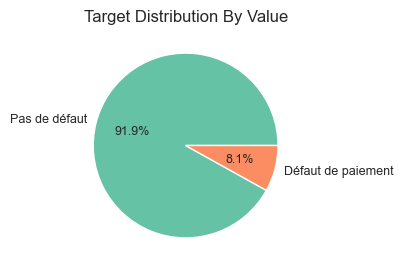

In [106]:

# Répartition de la variable cible
print(application_train.shape)

plt.figure(figsize=(3,3))
labels=["Pas de défaut","Défaut de paiement"]
plt.pie(application_train["TARGET"].value_counts(),
        labels = labels,
        autopct='%.01f%%',
        textprops={'fontsize':9},
        colors=sns.color_palette('Set2')
)
plt.title(label="Target Distribution By Value")
plt.show()

## Valeurs manquantes

In [147]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df, seuil):
    # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    cols_with_missing_values = [col for col in df.columns if df[col].isnull().mean() > seuil]

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.\n"
        "There are " + str(len(cols_with_missing_values)) + f" columns that have more than {seuil*100}% of missing values.\n")


    # Return the dataframe with missing information
    return mis_val_table_ren_columns, cols_with_missing_values

# Missing values statistics
missing_values, cols_with_50pct_missing_values = missing_values_table(application_train, seuil = 0.5)
missing_values.head(80)



Your selected dataframe has 81 columns.
There are 26 columns that have missing values.
There are 0 columns that have more than 50.0% of missing values.



,Missing Values,% of Total Values
FLOORSMAX_AVG,153020,49.8
FLOORSMAX_MODE,153020,49.8
FLOORSMAX_MEDI,153020,49.8
YEARS_BEGINEXPLUATATION_MEDI,150007,48.8
YEARS_BEGINEXPLUATATION_MODE,150007,48.8
YEARS_BEGINEXPLUATATION_AVG,150007,48.8
TOTALAREA_MODE,148431,48.3
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8


In [148]:
cols_with_50pct_missing_values
application_train[cols_with_50pct_missing_values].dtypes

Series([], dtype: object)

In [117]:
application_train[cols_with_50pct_missing_values].describe(include=[np.number]).T


,count,mean,std,min,25%,50%,75%,max
OWN_CAR_AGE,104582.0,12.061091,11.944812,0.000000,5.000000,9.000000,15.000000,91.000000
EXT_SOURCE_1,134133.0,0.502130,0.211062,0.014568,0.334007,0.505998,0.675053,0.962693
APARTMENTS_AVG,151450.0,0.117440,0.108240,0.000000,0.057700,0.087600,0.148500,1.000000
BASEMENTAREA_AVG,127568.0,0.088442,0.082438,0.000000,0.044200,0.076300,0.112200,1.000000
YEARS_BUILD_AVG,103023.0,0.752471,0.113280,0.000000,0.687200,0.755200,0.823200,1.000000
COMMONAREA_AVG,92646.0,0.044621,0.076036,0.000000,0.007800,0.021100,0.051500,1.000000
ELEVATORS_AVG,143620.0,0.078942,0.134576,0.000000,0.000000,0.000000,0.120000,1.000000
ENTRANCES_AVG,152683.0,0.149725,0.100049,0.000000,0.069000,0.137900,0.206900,1.000000
FLOORSMIN_AVG,98869.0,0.231894,0.161380,0.000000,0.083300,0.208300,0.375000,1.000000
LANDAREA_AVG,124921.0,0.066333,0.081184,0.000000,0.018700,0.048100,0.085600,1.000000


In [118]:
# Drop columns with more than 50% missing values
application_train.drop(labels=cols_with_50pct_missing_values, axis=1, inplace=True)
print(application_train.shape)

(307511, 81)


In [119]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

### Imputation des valeurs manquantes

In [ ]:
# Suppression de la variable cible dans le X-train
y_train = application_train['TARGET']
X_train = application_train.drop(labels='TARGET', axis=1, inplace=False)
X_train.shape, y_train.shape

# Split numerical and categorical columns
numeric_columns = X_train.select_dtypes(include='number').columns
categorical_columns = X_train.select_dtypes(include='object').columns

#create two DataFrames, one for each data type
data_numeric = X_train[numeric_columns]
data_categorical = X_train[categorical_columns]

# Impute missing values for numerical columns with median values
si = SimpleImputer(missing_values=np.nan, strategy='median')
data_numeric = pd.DataFrame(si.fit_transform(data_numeric), columns = si.get_feature_names_out())

# Impute missing values for categorical columns with most frequent values
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_categorical = pd.DataFrame(si.fit_transform(data_categorical), columns = si.get_feature_names_out())

In [ ]:
# Check null values for data_numeric
data_numeric[numeric_columns].isnull().mean()

SK_ID_CURR                      0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT                      0.0
AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.0
REGION_POPULATION_RELATIVE      0.0
DAYS_BIRTH                      0.0
DAYS_EMPLOYED                   0.0
DAYS_REGISTRATION               0.0
DAYS_ID_PUBLISH                 0.0
FLAG_MOBIL                      0.0
FLAG_EMP_PHONE                  0.0
FLAG_WORK_PHONE                 0.0
FLAG_CONT_MOBILE                0.0
FLAG_PHONE                      0.0
FLAG_EMAIL                      0.0
CNT_FAM_MEMBERS                 0.0
REGION_RATING_CLIENT            0.0
REGION_RATING_CLIENT_W_CITY     0.0
HOUR_APPR_PROCESS_START         0.0
REG_REGION_NOT_LIVE_REGION      0.0
REG_REGION_NOT_WORK_REGION      0.0
LIVE_REGION_NOT_WORK_REGION     0.0
REG_CITY_NOT_LIVE_CITY          0.0
REG_CITY_NOT_WORK_CITY          0.0
LIVE_CITY_NOT_WORK_CITY         0.0
EXT_SOURCE_2                

In [ ]:
# Check null values for data_categorical
data_categorical[categorical_columns].isnull().mean()

NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
NAME_TYPE_SUITE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
OCCUPATION_TYPE               0.0
WEEKDAY_APPR_PROCESS_START    0.0
ORGANIZATION_TYPE             0.0
EMERGENCYSTATE_MODE           0.0
dtype: float64

In [ ]:
#join the two masked dataframes back together
X_train_joined = pd.concat([data_numeric, data_categorical], axis = 1)

In [151]:
X_train_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  float64
 1   CNT_CHILDREN                  307511 non-null  float64
 2   AMT_INCOME_TOTAL              307511 non-null  float64
 3   AMT_CREDIT                    307511 non-null  float64
 4   AMT_ANNUITY                   307511 non-null  float64
 5   AMT_GOODS_PRICE               307511 non-null  float64
 6   REGION_POPULATION_RELATIVE    307511 non-null  float64
 7   DAYS_BIRTH                    307511 non-null  float64
 8   DAYS_EMPLOYED                 307511 non-null  float64
 9   DAYS_REGISTRATION             307511 non-null  float64
 10  DAYS_ID_PUBLISH               307511 non-null  float64
 11  FLAG_MOBIL                    307511 non-null  float64
 12  FLAG_EMP_PHONE                307511 non-nul

In [152]:
print(X_train_joined.select_dtypes(exclude=[np.number]).columns.to_list())


['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']


In [ ]:
df_distinct_values_cat_columns = pd.DataFrame({},)
df_distinct_values_cat_columns['categorical_columns'] = categorical_columns
df_distinct_values_cat_columns['nb_distinct_values'] = [X_train_joined[col].nunique() for col in X_train_joined[categorical_columns]]
df_distinct_values_cat_columns['list_of_values'] = [', '.join(np.unique(X_train_joined[col].values)) for col in categorical_columns]
df_distinct_values_cat_columns.style.background_gradient(cmap='PuBu')


,categorical_columns,nb_distinct_values,list_of_values
0,NAME_CONTRACT_TYPE,2,"Cash loans, Revolving loans"
1,CODE_GENDER,3,"F, M, XNA"
2,FLAG_OWN_CAR,2,"N, Y"
3,FLAG_OWN_REALTY,2,"N, Y"
4,NAME_TYPE_SUITE,7,"Children, Family, Group of people, Other_A, Other_B, Spouse, partner, Unaccompanied"
5,NAME_INCOME_TYPE,8,"Businessman, Commercial associate, Maternity leave, Pensioner, State servant, Student, Unemployed, Working"
6,NAME_EDUCATION_TYPE,5,"Academic degree, Higher education, Incomplete higher, Lower secondary, Secondary / secondary special"
7,NAME_FAMILY_STATUS,6,"Civil marriage, Married, Separated, Single / not married, Unknown, Widow"
8,NAME_HOUSING_TYPE,6,"Co-op apartment, House / apartment, Municipal apartment, Office apartment, Rented apartment, With parents"
9,OCCUPATION_TYPE,18,"Accountants, Cleaning staff, Cooking staff, Core staff, Drivers, HR staff, High skill tech staff, IT staff, Laborers, Low-skill Laborers, Managers, Medicine staff, Private service staff, Realty agents, Sales staff, Secretaries, Security staff, Waiters/barmen staff"


In [ ]:
# - Traitement des missing values Imputation : Médiane/Min/Max pour valerus numériques + Valeurs catégorielles
# - Ajout de colonnes ou discretisation des valeurs continues (bins)
# - Check corrélation par paire et suppression si très corrélés
# Khi2
# RFE
# Passer sur tous les fichiers et en faire des fonctions par fichiers

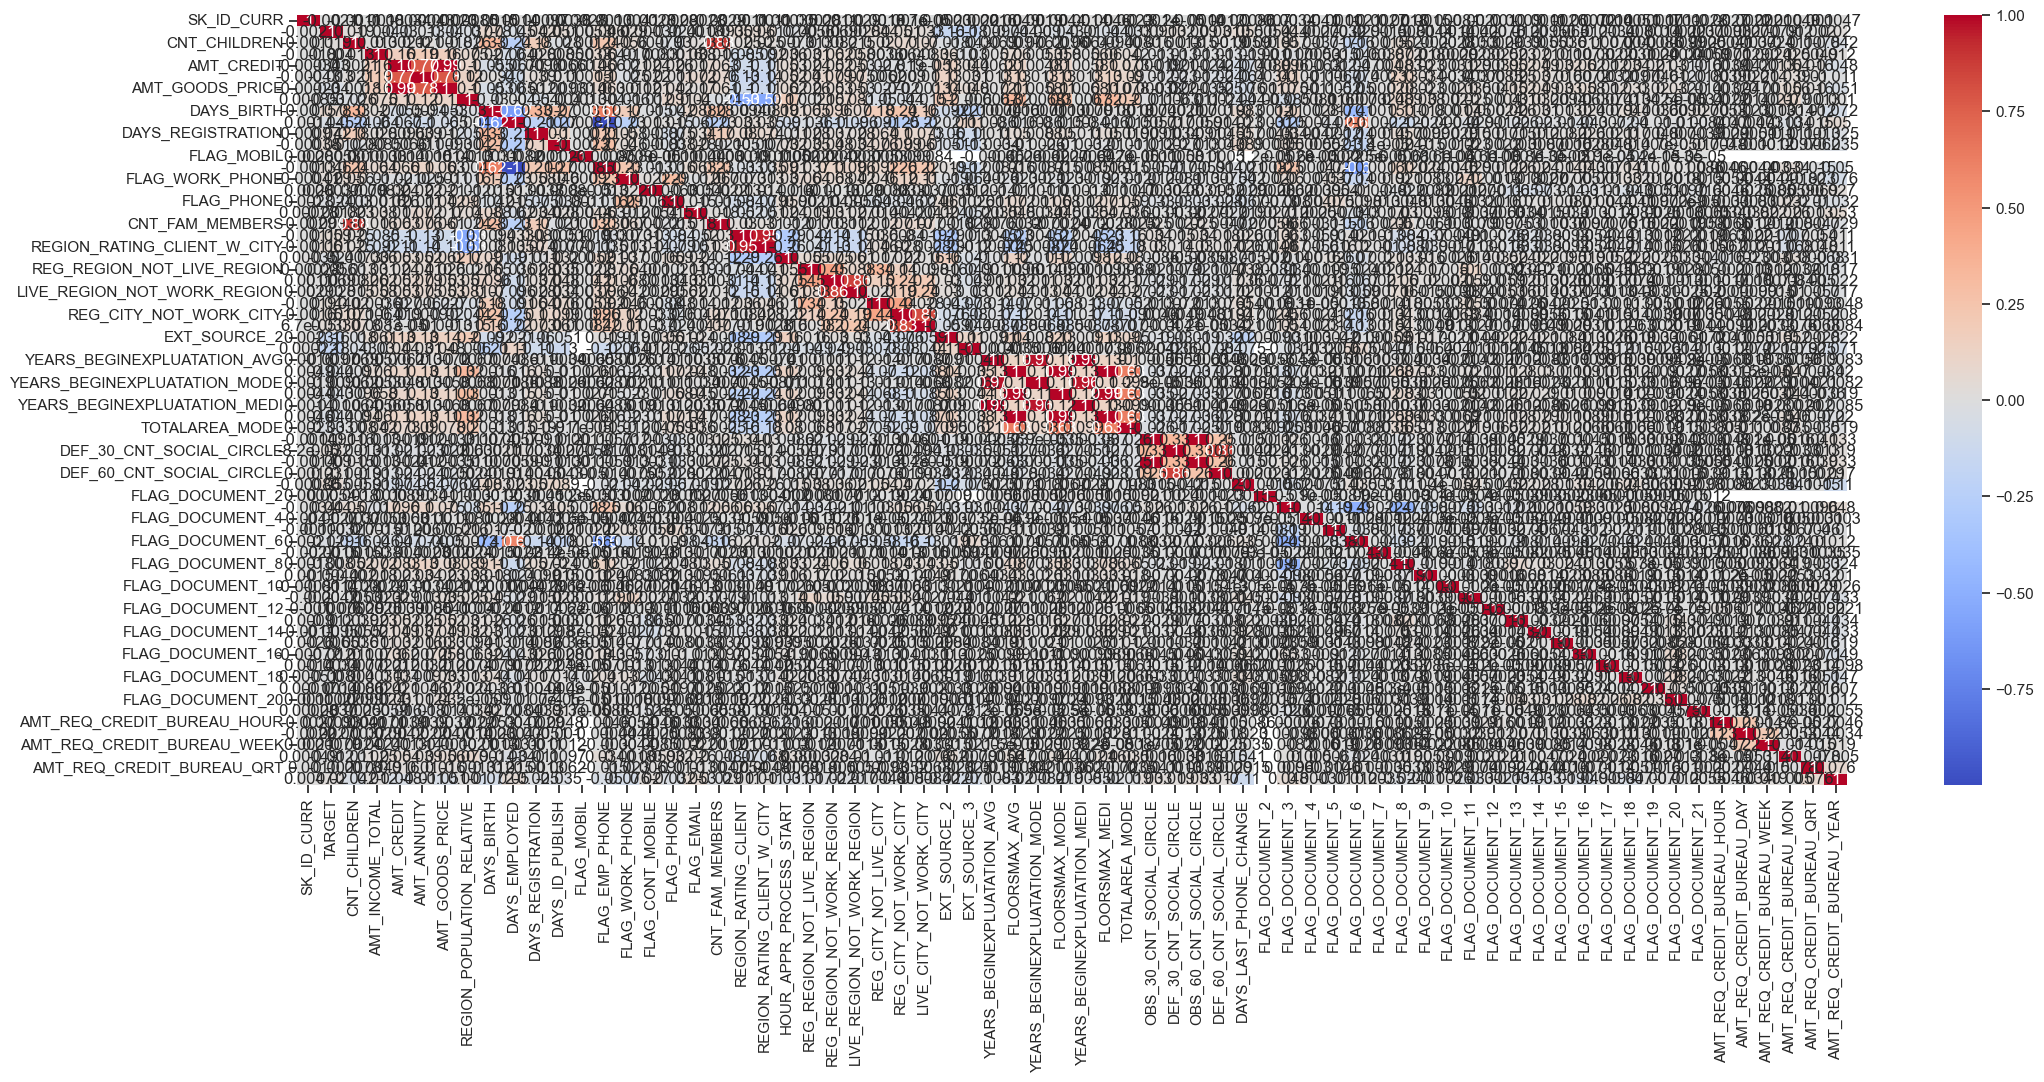

[('DAYS_EMPLOYED', 'FLAG_EMP_PHONE'),
 ('FLAG_EMP_PHONE', 'DAYS_EMPLOYED'),
 ('OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'),
 ('OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE'),
 ('FLOORSMAX_AVG', 'FLOORSMAX_MEDI'),
 ('FLOORSMAX_MEDI', 'FLOORSMAX_AVG'),
 ('YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG'),
 ('YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI'),
 ('FLOORSMAX_MODE', 'FLOORSMAX_MEDI'),
 ('FLOORSMAX_MEDI', 'FLOORSMAX_MODE'),
 ('AMT_CREDIT', 'AMT_GOODS_PRICE'),
 ('AMT_GOODS_PRICE', 'AMT_CREDIT'),
 ('FLOORSMAX_MODE', 'FLOORSMAX_AVG'),
 ('FLOORSMAX_AVG', 'FLOORSMAX_MODE'),
 ('YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG'),
 ('YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE'),
 ('YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI'),
 ('YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE'),
 ('REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT'),
 ('REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_

In [91]:
# Compute the correlation matrix
corr_matrix = application_train.corr(numeric_only=True)

# Plot the heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Identify highly correlated pairs
threshold = 0.8
corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr = [(a, b) for a, b in corr_pairs.index if a != b and corr_pairs[(a, b)] > threshold]
high_corr